In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import datasets
from sklearn import metrics


%matplotlib inline

In [5]:
iris = sb.load_dataset("iris")

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

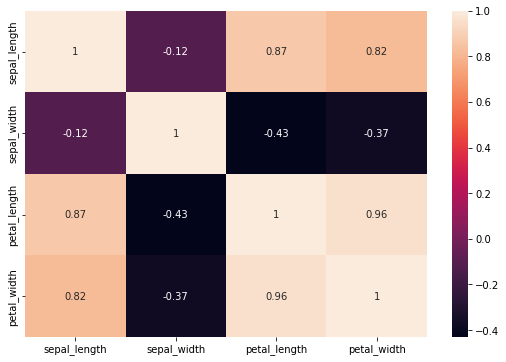

In [8]:
correlation_matrix = iris.corr().round(2)

plt.figure(figsize=(9,6))

sb.heatmap(data=correlation_matrix, annot = True)

<AxesSubplot:>

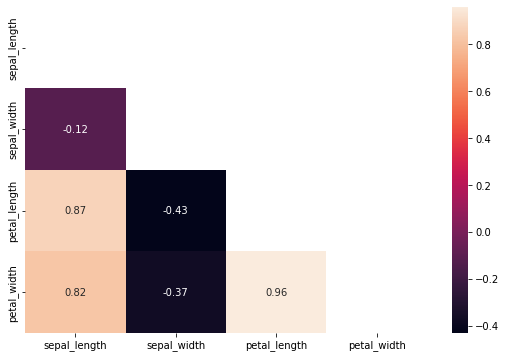

In [9]:
mask = np.zeros_like(correlation_matrix)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True, mask=mask)

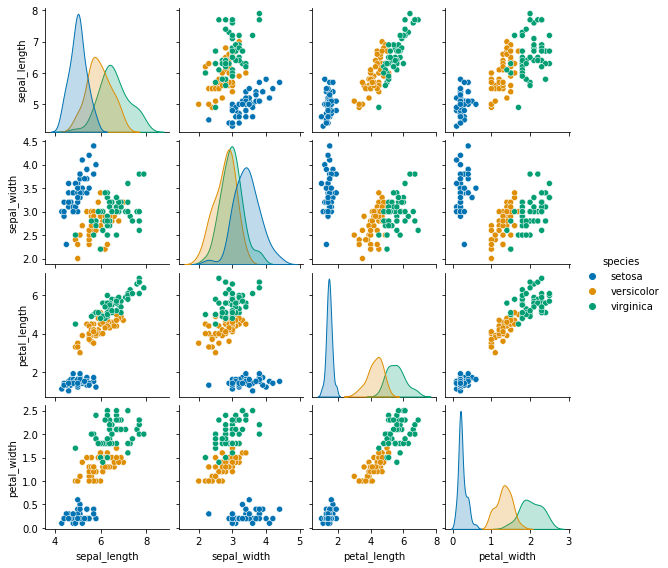

In [10]:
sb.pairplot(iris, hue="species", height = 2, palette = 'colorblind')

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris.replace(0, np.nan, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
iris.isnull().sum()/len(iris)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [14]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y = iris["species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (105, 4)
X_test shape:  (45, 4)
y_train shape:  (105,)
y_test shape:  (45,)


In [19]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
141,6.9,3.1,5.1,2.3
89,5.5,2.5,4.0,1.3
5,5.4,3.9,1.7,0.4
83,6.0,2.7,5.1,1.6
...,...,...,...,...
125,7.2,3.2,6.0,1.8
123,6.3,2.7,4.9,1.8
65,6.7,3.1,4.4,1.4
69,5.6,2.5,3.9,1.1


In [17]:
from sklearn.linear_model import LinearRegression


irisLinReg = LinearRegression()

irisLinReg.fit(X_train,y_train)

ValueError: could not convert string to float: 'virginica'